In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\pc\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\pc\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
ocean_discord = pd.read_csv('oceandiscord.csv')
ocean_discord.head(5)

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1)
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1)
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1)


In [6]:
ocean_discord['Date'] = pd.to_datetime(ocean_discord['Date'])
ocean_discord['message_count'] = 1

print(f'The dataset has the following shape{ocean_discord.shape}')
ocean_discord.info()

The dataset has the following shape(84754, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Channel        84754 non-null  object        
 1   AuthorID       84754 non-null  int64         
 2   Author         84754 non-null  object        
 3   Date           84754 non-null  datetime64[ns]
 4   Content        64609 non-null  object        
 5   Attachments    1959 non-null   object        
 6   Reactions      6073 non-null   object        
 7   message_count  84754 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 5.2+ MB


In [9]:
ocean_discord.Date.min(), ocean_discord.Date.max()

(Timestamp('2019-08-20 19:55:00'), Timestamp('2024-02-20 18:04:00'))

C:\Users\pc\AppData\Local\Temp/ipykernel_7224/227861679.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='M'), 'Channel']).size().reset_index(name='Message_Count')


ValueError: Unrecognized character M in format string

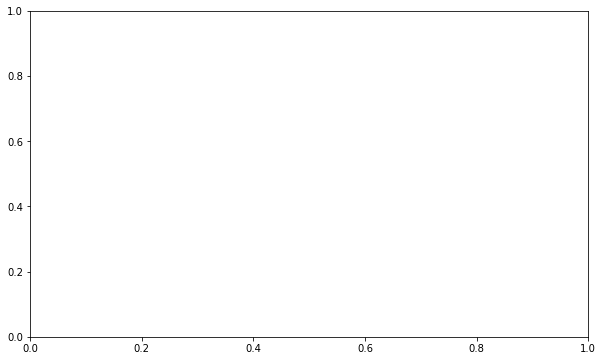

In [16]:
import seaborn as sns

df_monthly = ocean_discord.groupby([pd.Grouper(key='Date', freq='M'), 'Channel']).size().reset_index(name='Message_Count')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot('Date','Message_Count')
plt.title('Monthly Message Count Over Time by Channel')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Identify potential outliers by channel
outliers = df_monthly[df_monthly['Message_Count'] > df_monthly.groupby('Channel')['Message_Count'].transform(lambda x: x.mean() + 2 * x.std())]
print("Potential outlier periods by channel:")
print(outliers)